# Movie Recommendation System V2

In [1]:
import pandas as pd
import unidecode
import re

### Reading CSV files

In [2]:
movies=pd.read_csv("movies.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
86532,288967,State of Siege: Temple Attack (2021),Action|Drama
86533,288971,Ouija Japan (2021),Action|Horror
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller


In [3]:
ratings=pd.read_csv("ratings.csv")
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119
...,...,...,...,...
33832157,330975,8340,2.0,1091583256
33832158,330975,8493,2.5,1091585709
33832159,330975,8622,4.0,1091581777
33832160,330975,8665,3.0,1091581765


In [4]:
tags=pd.read_csv("tags.csv")
tags

,userId,movieId,tag,timestamp
0,10,260,good vs evil,1430666558
1,10,260,Harrison Ford,1430666505
2,10,260,sci-fi,1430666538
3,14,1221,Al Pacino,1311600756
4,14,1221,mafia,1311600746
...,...,...,...,...
2328310,330923,176599,politically correct,1507547491
2328311,330933,3317,coming of age,1351279384
2328312,330933,3317,sexuality,1351279389
2328313,330947,5782,Not Luc Besson,1154110902


In [5]:
ge_score=pd.read_csv("genome-scores.csv")
ge_score

,movieId,tagId,relevance
0,1,1,0.03200
1,1,2,0.02225
2,1,3,0.07000
3,1,4,0.05900
4,1,5,0.12300
...,...,...,...
18472123,288167,1124,0.09875
18472124,288167,1125,0.02950
18472125,288167,1126,0.02275
18472126,288167,1127,0.11225


In [6]:
ge_tags=pd.read_csv("genome-tags.csv")
ge_tags

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [ ]:
# Merging movies with ratings on movieid
merged_df=movies.merge(ratings,on="movieId")
merged_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1225734739
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,835815971
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.0,974518024
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,3.0,1430666394
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,12,5.0,862500738
...,...,...,...,...,...,...
33832157,288967,State of Siege: Temple Attack (2021),Action|Drama,47791,3.5,1689748357
33832158,288971,Ouija Japan (2021),Action|Horror,98408,0.5,1689798322
33832159,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary,154483,4.0,1689812351
33832160,288977,Skinford: Death Sentence (2023),Crime|Thriller,291389,3.0,1689815902


In [8]:
merged_df.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

In [9]:
merged_df.drop("timestamp",axis="columns",inplace=True)

In [10]:
merged_df[merged_df["movieId"]==1]["rating"].mean()

3.8935076093890357

In [ ]:
# Aggregating Movie Ratings by Titles
merged_df=merged_df.groupby(['movieId', 'title', 'genres'])["rating"].mean().reset_index()
merged_df

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893508
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.278179
2,3,Grumpier Old Men (1995),Comedy|Romance,3.171271
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.868395
4,5,Father of the Bride Part II (1995),Comedy,3.076957
...,...,...,...,...
83234,288967,State of Siege: Temple Attack (2021),Action|Drama,3.500000
83235,288971,Ouija Japan (2021),Action|Horror,0.500000
83236,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary,4.000000
83237,288977,Skinford: Death Sentence (2023),Crime|Thriller,3.000000


In [12]:
ge_merged=ge_tags.merge(ge_score,on="tagId")
ge_merged

,tagId,tag,movieId,relevance
0,1,007,1,0.03200
1,1,007,2,0.03250
2,1,007,3,0.04150
3,1,007,4,0.03150
4,1,007,5,0.03950
...,...,...,...,...
18472123,1128,zombies,286901,0.01500
18472124,1128,zombies,286905,0.02375
18472125,1128,zombies,287377,0.03525
18472126,1128,zombies,287633,0.02550


<Axes: >

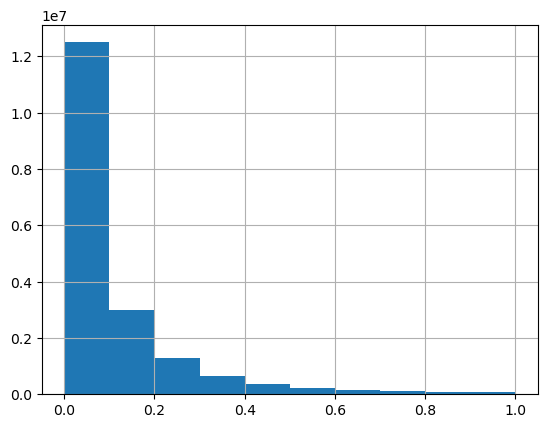

In [ ]:
# Checking distribution of Relevance Scores
ge_merged["relevance"].hist()

In [ ]:
# Filtering out less relevant tags
ge_merged=ge_merged[ge_merged["relevance"]>0.8]
ge_merged

,tagId,tag,movieId,relevance
9,1,007,10,0.99925
1534,1,007,1722,0.99950
2127,1,007,2376,0.99950
2665,1,007,2947,0.99950
2666,1,007,2948,0.99975
...,...,...,...,...
18469889,1128,zombies,164367,0.97825
18469892,1128,zombies,164395,0.99000
18470080,1128,zombies,168498,0.89100
18470190,1128,zombies,170913,0.98200


In [ ]:
# Merging all tags for every movie on genome-tags data
movie_profile=ge_merged.groupby("movieId")["tag"].apply(lambda x : " ".join(x)).to_frame().reset_index()
movie_profile

,movieId,tag
0,1,adventure animated animation cartoon cgi child...
1,2,adventure animals based on a book childhood ch...
2,3,comedy good sequel sequel sequels
3,4,chick flick women
4,5,comedy family father daughter relationship goo...
...,...,...
15460,286901,original
15461,286905,action adventure original pg-13 plot
15462,287377,original
15463,287633,original


In [16]:
tags

,userId,movieId,tag,timestamp
0,10,260,good vs evil,1430666558
1,10,260,Harrison Ford,1430666505
2,10,260,sci-fi,1430666538
3,14,1221,Al Pacino,1311600756
4,14,1221,mafia,1311600746
...,...,...,...,...
2328310,330923,176599,politically correct,1507547491
2328311,330933,3317,coming of age,1351279384
2328312,330933,3317,sexuality,1351279389
2328313,330947,5782,Not Luc Besson,1154110902


In [17]:
tags["tag"]=tags["tag"].astype(str)

In [ ]:
# Merging all movie tags for every movie on tags data
tags=tags.groupby("movieId")["tag"].apply(lambda x : " ".join(x)).reset_index()
tags

,movieId,tag
0,1,animation friendship toys animation Disney Pix...
1,2,animals based on a book fantasy magic board ga...
2,3,sequel moldy old old age old men wedding old p...
3,4,characters chick flick girl movie characters c...
4,5,family pregnancy wedding 4th wall aging baby d...
...,...,...
53447,288765,post-apocalyptic survival tw suicide apocalyps...
53448,288779,Don Camillo Series
53449,288849,addiction animation short film
53450,288937,anime


In [19]:
len(tags),len(movie_profile)

(53452, 15465)

In [ ]:
# merging genome-tags and tags datasets using left join to preserve data
movie_tags=tags.merge(movie_profile,on="movieId",how="left")
movie_tags

,movieId,tag_x,tag_y
0,1,animation friendship toys animation Disney Pix...,adventure animated animation cartoon cgi child...
1,2,animals based on a book fantasy magic board ga...,adventure animals based on a book childhood ch...
2,3,sequel moldy old old age old men wedding old p...,comedy good sequel sequel sequels
3,4,characters chick flick girl movie characters c...,chick flick women
4,5,family pregnancy wedding 4th wall aging baby d...,comedy family father daughter relationship goo...
...,...,...,...
53447,288765,post-apocalyptic survival tw suicide apocalyps...,NaN
53448,288779,Don Camillo Series,NaN
53449,288849,addiction animation short film,NaN
53450,288937,anime,NaN


In [21]:
movie_tags.isna().sum()

movieId        0
tag_x          0
tag_y      38135
dtype: int64

In [ ]:
# Filling the NaN values with empty strings for easier concantenation
movie_tags["tag_y"]=movie_tags["tag_y"].fillna("")
movie_tags.isna().sum()

movieId    0
tag_x      0
tag_y      0
dtype: int64

In [ ]:
# Merginig both highly relevant genome tags with user based tags for high quality movie description
movie_tags["all_tags"]=movie_tags["tag_x"]+" "+movie_tags["tag_y"]
movie_tags=movie_tags[["movieId","all_tags"]]
movie_tags

,movieId,all_tags
0,1,animation friendship toys animation Disney Pix...
1,2,animals based on a book fantasy magic board ga...
2,3,sequel moldy old old age old men wedding old p...
3,4,characters chick flick girl movie characters c...
4,5,family pregnancy wedding 4th wall aging baby d...
...,...,...
53447,288765,post-apocalyptic survival tw suicide apocalyps...
53448,288779,Don Camillo Series
53449,288849,addiction animation short film
53450,288937,anime


### Preprocessing

In [24]:
def regx(x):
    x = unidecode.unidecode(x)
    clean = re.sub(r"https?://\S+|www\S+","",x)       # remove URLs
    clean = re.sub(r"[<>]"," ",clean)                 # remove <>
    clean = re.sub(r"(\d)\s*d\b", r"\1d", clean)      # fix 3d / 3 d

    clean = re.sub(r"(\w)\s+'s\b", r"\1's", clean)

    clean = re.sub(r"[^\x00-\x7F]+", " ", clean)      # remove non-ascii
    clean = re.sub(r"[^0-9A-Za-z\s']", " ", clean)    # keep apostrophes
    clean = re.sub(r"\b[a-z]{1,2}\b", "", clean)      # removing 1,2 lettered junkies

    clean = re.sub(r"\s+"," ",clean).lower().strip()  # collapse spaces

    tokens = clean.split()
    unique_tokens = list(dict.fromkeys(tokens))
    return " ".join(unique_tokens)

In [25]:
movie_tags["all_tags"]=movie_tags["all_tags"].apply(regx)
movie_tags

/tmp/ipykernel_15555/85437955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_tags["all_tags"]=movie_tags["all_tags"].apply(regx)


,movieId,all_tags
0,1,animation friendship toys disney pixar cgi cla...
1,2,animals based book fantasy magic board game mo...
2,3,sequel moldy old age men wedding people that a...
3,4,characters chick flick girl movie revenge clv ...
4,5,family pregnancy wedding 4th wall aging baby d...
...,...,...
53447,288765,post apocalyptic survival suicide apocalypse b...
53448,288779,don camillo series
53449,288849,addiction animation short film
53450,288937,anime


In [26]:
merged_df

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893508
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.278179
2,3,Grumpier Old Men (1995),Comedy|Romance,3.171271
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.868395
4,5,Father of the Bride Part II (1995),Comedy,3.076957
...,...,...,...,...
83234,288967,State of Siege: Temple Attack (2021),Action|Drama,3.500000
83235,288971,Ouija Japan (2021),Action|Horror,0.500000
83236,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary,4.000000
83237,288977,Skinford: Death Sentence (2023),Crime|Thriller,3.000000


In [ ]:
# Merging Movie titles with descriptive tags and preserving data
final_df=merged_df.merge(movie_tags,on="movieId",how="left")
final_df

,movieId,title,genres,rating,all_tags
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893508,animation friendship toys disney pixar cgi cla...
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.278179,animals based book fantasy magic board game mo...
2,3,Grumpier Old Men (1995),Comedy|Romance,3.171271,sequel moldy old age men wedding people that a...
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.868395,characters chick flick girl movie revenge clv ...
4,5,Father of the Bride Part II (1995),Comedy,3.076957,family pregnancy wedding 4th wall aging baby d...
...,...,...,...,...,...
83234,288967,State of Siege: Temple Attack (2021),Action|Drama,3.500000,NaN
83235,288971,Ouija Japan (2021),Action|Horror,0.500000,NaN
83236,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary,4.000000,NaN
83237,288977,Skinford: Death Sentence (2023),Crime|Thriller,3.000000,NaN


In [28]:
final_df.isna().sum()

movieId         0
title           0
genres          0
rating          0
all_tags    33085
dtype: int64

<Axes: >

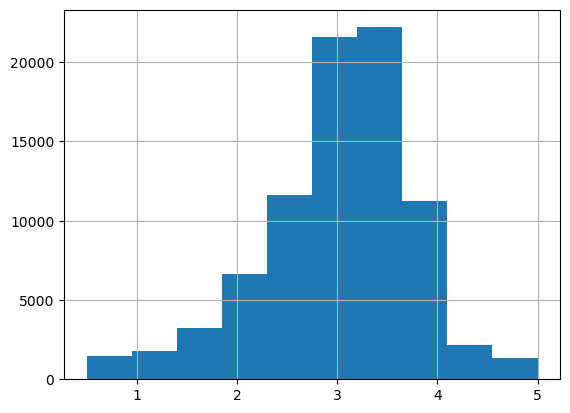

In [ ]:
# Checking the distribution of ratings
final_df["rating"].hist()

In [ ]:
# Checking low rated movies
final_df[final_df['rating']<1.5]

,movieId,title,genres,rating,all_tags
1447,1495,Turbo: A Power Rangers Movie (1997),Action|Adventure|Children,1.446317,retarded california car child hero film starts...
1740,1826,Barney's Great Adventure (1998),Adventure|Children,1.234341,acting based show dinosaur music talking anima...
1901,1990,Prom Night IV: Deliver Us From Evil (1992),Horror,1.467647,casual sex monk murder nun priest slasher fran...
3475,3573,Carnosaur 2 (1995),Horror|Sci-Fi,1.488889,dinosaur dinosaurs alien invasion aliens first...
3476,3574,Carnosaur 3: Primal Species (1996),Horror|Sci-Fi,1.367742,colonel dinosaur doctor female police officer ...
...,...,...,...,...,...
83225,288945,Mr. Car and the Knights Templar (2023),Adventure,0.750000,NaN
83226,288947,The Year I Started Masturbating (2022),Comedy|Drama|Romance,0.500000,NaN
83227,288949,Eldorado: Everything the Nazis Hate (2023),Documentary,0.500000,NaN
83231,288957,Ballet Of Blood (2016),Horror,1.000000,NaN


In [ ]:
# Extracting release year 
final_df["year"] = (
    final_df["title"]
    .str.extract(r"\((\d{4})\)$")
    .astype("Int64")
)

In [34]:
final_df

,movieId,title,genres,rating,all_tags,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893508,animation friendship toys disney pixar cgi cla...,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.278179,animals based book fantasy magic board game mo...,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.171271,sequel moldy old age men wedding people that a...,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.868395,characters chick flick girl movie revenge clv ...,1995
4,5,Father of the Bride Part II (1995),Comedy,3.076957,family pregnancy wedding 4th wall aging baby d...,1995
...,...,...,...,...,...,...
83234,288967,State of Siege: Temple Attack (2021),Action|Drama,3.500000,NaN,2021
83235,288971,Ouija Japan (2021),Action|Horror,0.500000,NaN,2021
83236,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary,4.000000,NaN,1973
83237,288977,Skinford: Death Sentence (2023),Crime|Thriller,3.000000,NaN,2023


<Axes: >

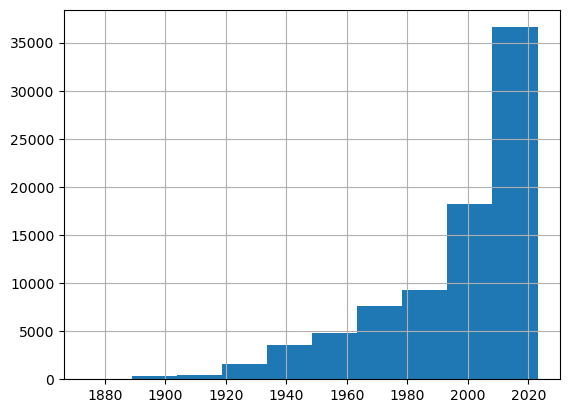

In [ ]:
# Checking the distribution of release years
final_df["year"].hist()

In [ ]:
# Filtering out ratings <2 and movies released before 1920 
print(len(final_df))
final_df=final_df[(final_df["rating"]>2) & (final_df["year"]>=1920)]
final_df

83239


,movieId,title,genres,rating,all_tags,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893508,animation friendship toys disney pixar cgi cla...,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.278179,animals based book fantasy magic board game mo...,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.171271,sequel moldy old age men wedding people that a...,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.868395,characters chick flick girl movie revenge clv ...,1995
4,5,Father of the Bride Part II (1995),Comedy,3.076957,family pregnancy wedding 4th wall aging baby d...,1995
...,...,...,...,...,...,...
83233,288965,Камертон (1979),Romance,2.500000,NaN,1979
83234,288967,State of Siege: Temple Attack (2021),Action|Drama,3.500000,NaN,2021
83236,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary,4.000000,NaN,1973
83237,288977,Skinford: Death Sentence (2023),Crime|Thriller,3.000000,NaN,2023


In [37]:
final_df["all_tags"].values[0]

"animation friendship toys disney pixar cgi classic lots heart tom hanks clever funny witty comedy kids toy story animated fun jealousy adventure family fantasy john lasseter usa film dolls national registry buddy movie enemies become friends cartoon relationships feel good first series heroic mission humorous loyal friend loyalty redemption reflection rescue rivalry selflessness teamwork unlikely friendships unusual os dois viram imdb top 250 accepting reality emotional soundtrack tumey' to see again vhs action figure figures buzz lightyear cg woody children computer owned tim allen time travel feature ta leoni does not star this sci interesting rainy day watchlist lovable characters avi buy want the boys bright daring rescues fanciful light rousing come life warm beautiful villian hurts american animmation digital itaege erlend' dvds fast and furious monsters soothing rated g 3d favorite almost 2009 reissue stereoscopic 3 d 55 movies every kid should entertainment weekly bd video clv

In [39]:
len(final_df["all_tags"].values[0])

4009

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter=RecursiveCharacterTextSplitter(chunk_size=800,chunk_overlap=150)

/home/abhi/miniforge3/envs/tf_gpu/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-12-18 05:18:21.435755: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-18 05:18:21.455252: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-18 05:18:21.461926: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-18 05:18:21.479495: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow 

In [ ]:
# Chunking the tags
splitter.split_text(final_df["all_tags"].values[0])

["animation friendship toys disney pixar cgi classic lots heart tom hanks clever funny witty comedy kids toy story animated fun jealousy adventure family fantasy john lasseter usa film dolls national registry buddy movie enemies become friends cartoon relationships feel good first series heroic mission humorous loyal friend loyalty redemption reflection rescue rivalry selflessness teamwork unlikely friendships unusual os dois viram imdb top 250 accepting reality emotional soundtrack tumey' to see again vhs action figure figures buzz lightyear cg woody children computer owned tim allen time travel feature ta leoni does not star this sci interesting rainy day watchlist lovable characters avi buy want the boys bright daring rescues fanciful light rousing come life warm beautiful villian hurts",
 "rainy day watchlist lovable characters avi buy want the boys bright daring rescues fanciful light rousing come life warm beautiful villian hurts american animmation digital itaege erlend' dvds fa

In [42]:
final_df

,movieId,title,genres,rating,all_tags,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893508,animation friendship toys disney pixar cgi cla...,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.278179,animals based book fantasy magic board game mo...,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.171271,sequel moldy old age men wedding people that a...,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.868395,characters chick flick girl movie revenge clv ...,1995
4,5,Father of the Bride Part II (1995),Comedy,3.076957,family pregnancy wedding 4th wall aging baby d...,1995
...,...,...,...,...,...,...
83233,288965,Камертон (1979),Romance,2.500000,NaN,1979
83234,288967,State of Siege: Temple Attack (2021),Action|Drama,3.500000,NaN,2021
83236,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary,4.000000,NaN,1973
83237,288977,Skinford: Death Sentence (2023),Crime|Thriller,3.000000,NaN,2023


In [43]:
final_df["all_tags"].isna().sum()

25985

In [44]:
final_df["all_tags"]=final_df["all_tags"].fillna("")
final_df

/tmp/ipykernel_15555/2659712131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["all_tags"]=final_df["all_tags"].fillna("")


,movieId,title,genres,rating,all_tags,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893508,animation friendship toys disney pixar cgi cla...,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.278179,animals based book fantasy magic board game mo...,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.171271,sequel moldy old age men wedding people that a...,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.868395,characters chick flick girl movie revenge clv ...,1995
4,5,Father of the Bride Part II (1995),Comedy,3.076957,family pregnancy wedding 4th wall aging baby d...,1995
...,...,...,...,...,...,...
83233,288965,Камертон (1979),Romance,2.500000,,1979
83234,288967,State of Siege: Temple Attack (2021),Action|Drama,3.500000,,2021
83236,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary,4.000000,,1973
83237,288977,Skinford: Death Sentence (2023),Crime|Thriller,3.000000,,2023


### RAG Application

In [ ]:
# Chunking the tags and Extracting metadata
all_texts=[]
all_meta=[]
for id, row in final_df.iterrows():
    base_meta={"movieid":row["movieId"],"title":row["title"],"genres":row["genres"],"rating":row['rating']}
    chu=splitter.split_text(row["all_tags"])
    for chuid, chunk in enumerate(chu):
        chunk_text=(f"Genres: {row['genres']}\n Chunk: {chunk}")
        all_texts.append(chunk_text)

        meta=base_meta.copy()
        meta["chunk_id"]=chuid
        all_meta.append(meta)

In [46]:
all_texts

["Genres: Adventure|Animation|Children|Comedy|Fantasy\n Chunk: animation friendship toys disney pixar cgi classic lots heart tom hanks clever funny witty comedy kids toy story animated fun jealousy adventure family fantasy john lasseter usa film dolls national registry buddy movie enemies become friends cartoon relationships feel good first series heroic mission humorous loyal friend loyalty redemption reflection rescue rivalry selflessness teamwork unlikely friendships unusual os dois viram imdb top 250 accepting reality emotional soundtrack tumey' to see again vhs action figure figures buzz lightyear cg woody children computer owned tim allen time travel feature ta leoni does not star this sci interesting rainy day watchlist lovable characters avi buy want the boys bright daring rescues fanciful light rousing come life warm beautiful villian hurts",
 "Genres: Adventure|Animation|Children|Comedy|Fantasy\n Chunk: rainy day watchlist lovable characters avi buy want the boys bright darin

In [47]:
all_meta

[{'movieid': 1,
  'title': 'Toy Story (1995)',
  'genres': 'Adventure|Animation|Children|Comedy|Fantasy',
  'rating': 3.8935076093890357,
  'chunk_id': 0},
 {'movieid': 1,
  'title': 'Toy Story (1995)',
  'genres': 'Adventure|Animation|Children|Comedy|Fantasy',
  'rating': 3.8935076093890357,
  'chunk_id': 1},
 {'movieid': 1,
  'title': 'Toy Story (1995)',
  'genres': 'Adventure|Animation|Children|Comedy|Fantasy',
  'rating': 3.8935076093890357,
  'chunk_id': 2},
 {'movieid': 1,
  'title': 'Toy Story (1995)',
  'genres': 'Adventure|Animation|Children|Comedy|Fantasy',
  'rating': 3.8935076093890357,
  'chunk_id': 3},
 {'movieid': 1,
  'title': 'Toy Story (1995)',
  'genres': 'Adventure|Animation|Children|Comedy|Fantasy',
  'rating': 3.8935076093890357,
  'chunk_id': 4},
 {'movieid': 1,
  'title': 'Toy Story (1995)',
  'genres': 'Adventure|Animation|Children|Comedy|Fantasy',
  'rating': 3.8935076093890357,
  'chunk_id': 5},
 {'movieid': 2,
  'title': 'Jumanji (1995)',
  'genres': 'Advent

In [ ]:
from langchain_community.vectorstores import FAISS
from langchain_huggingface.embeddings import HuggingFaceEmbeddings

embeddings=HuggingFaceEmbeddings(model="sentence-transformers/all-MiniLM-L6-v2")

# Embedding the data

movie_vectorstore=FAISS.from_texts(all_texts,metadatas=all_meta,embedding=embeddings)

In [71]:
retriver=movie_vectorstore.as_retriever(search_kwargs={"k":20})

In [ ]:
# RAG
results=retriver.invoke("imax")
results

[Document(id='c01f36db-7aff-4eb7-b8fc-c13a3d61d9fc', metadata={'movieid': 109850, 'title': 'Need for Speed (2014)', 'genres': 'Action|Crime|Drama|IMAX', 'rating': 2.894148936170213, 'chunk_id': 0}, page_content='Genres: Action|Crime|Drama|IMAX\n Chunk: cars racing 3d practical effects action martin dimensionalized 2 d 3 imax digital only dmr video game adaptation based car competition driver duringcreditsstinger money street race super speed aaron paul crappy american imogen poots adapted from'),
 Document(id='83e82e6f-a7fd-45c9-90ed-2b9dcc116af9', metadata={'movieid': 4460, 'title': 'Encounter in the Third Dimension (1999)', 'genres': 'IMAX', 'rating': 2.5714285714285716, 'chunk_id': 0}, page_content='Genres: IMAX\n Chunk: dvd video iwerks 3 d stereoscopic 3d imax independent film short'),
 Document(id='ba497318-0dd7-4fe6-ac8d-af6e709d31e5', metadata={'movieid': 4455, 'title': 'Thrill Ride: The Science of Fun (1997)', 'genres': 'Adventure|Documentary|IMAX', 'rating': 3.5, 'chunk_id': 

In [84]:
for x in results:
    print(f"Title: {x.metadata['title']}, Genres: {x.metadata['genres']}, Avg. Rating: {x.metadata['rating']:.2f}")

Title: Need for Speed (2014), Genres: Action|Crime|Drama|IMAX, Avg. Rating: 2.89
Title: Encounter in the Third Dimension (1999), Genres: IMAX, Avg. Rating: 2.57
Title: Thrill Ride: The Science of Fun (1997), Genres: Adventure|Documentary|IMAX, Avg. Rating: 3.50
Title: Ant Bully, The (2006), Genres: Adventure|Animation|Children|Comedy|Fantasy|IMAX, Avg. Rating: 2.69
Title: Wolves (1999), Genres: Documentary|IMAX, Avg. Rating: 3.02
Title: Wings of Courage (1995), Genres: Adventure|Romance|IMAX, Avg. Rating: 3.06
Title: Final Destination 5 (2011), Genres: Horror|Thriller|IMAX, Avg. Rating: 2.94
Title: How to Train Your Dragon (2010), Genres: Adventure|Animation|Children|Fantasy|IMAX, Avg. Rating: 3.91
Title: Titanica (1992), Genres: Documentary|IMAX, Avg. Rating: 3.20
Title: Tai Chi Hero (2012), Genres: Action|Comedy|Drama|Fantasy|Sci-Fi|IMAX, Avg. Rating: 3.03
Title: All Access (2001), Genres: Documentary|Musical|IMAX, Avg. Rating: 2.85
Title: Avengers, The (2012), Genres: Action|Adventu

In [74]:
ans=""
for x in results:
    ans+= f"Title: {x.metadata['title']}, Genres: {x.metadata['genres']}, Avg. Rating: {x.metadata['rating']:.2f}"+ "\n"


In [75]:
print(ans)

Title: Rattlesnake (2019), Genres: Drama|Horror|Mystery|Thriller, Avg. Rating: 2.57
Title: The Lost Patient (2022), Genres: Drama|Mystery|Thriller, Avg. Rating: 2.62
Title: Animals (2017), Genres: Drama|Mystery|Thriller, Avg. Rating: 2.50
Title: The Call (2020), Genres: Mystery|Thriller, Avg. Rating: 3.45
Title: Collector, The (1965), Genres: Drama|Horror|Thriller, Avg. Rating: 3.69
Title: Uninvited, The (2009), Genres: Drama|Horror|Mystery|Thriller, Avg. Rating: 3.19
Title: Clinical (2017), Genres: Thriller, Avg. Rating: 2.56
Title: The Vanished Elephant (2014), Genres: Mystery|Thriller, Avg. Rating: 3.25
Title: Locked In (2010), Genres: Drama|Thriller, Avg. Rating: 2.60
Title: Veronica (2017), Genres: Drama|Mystery|Thriller, Avg. Rating: 2.61
Title: The Ghoul (2017), Genres: Drama, Avg. Rating: 3.17
Title: Mad Detective (Sun taam) (2007), Genres: Action|Crime|Thriller, Avg. Rating: 3.54
Title: Crawlspace (2012), Genres: Horror|Mystery|Sci-Fi|Thriller, Avg. Rating: 2.23
Title: Berlin 

## LLM Output

In [76]:
from langchain_core.output_parsers import StrOutputParser
from langchain_groq.chat_models import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from all_api import groq_api

In [77]:
output=StrOutputParser()

In [78]:
llm=ChatGroq(api_key=groq_api,model="llama-3.1-8b-instant")

In [79]:
prompt = ChatPromptTemplate.from_messages([
    (
        "system",
        "You are a movie-description assistant. You are NOT allowed to invent movies, ratings, years, actors, directors, or plot details.\n"
        "Your ONLY knowledge source is the movie list provided by the user.\n\n"
        "For each movie in the list:\n"
        "1. Use ONLY the title, genres, and tags implied by the retrieval context.\n"
        "2. Generate a short 2–3 sentence description capturing the movie's tone, style, and themes.\n"
        "3. If tags imply horror, supernatural, documentary, thriller, etc., reflect that in the description.\n"
        "4. Do NOT mention actors, release year, plot points, or production details unless they appear explicitly.\n"
        "5. Keep the descriptions engaging, concise, and human-sounding.\n"
        "6. Re-rank the movies order based on the ratings given and display top 7 movies based on ranking and describe only them.\n"
        "DON'T DESCRIBE EVERY MOVIE JUST TOP RATED MOVIES ACCORDING TO THE RANKING ORDER"
    ),
    (
        "user",
        "Generate descriptions for the following movies:\n{context}"
    )
])

In [80]:
chain=prompt|llm|output

In [81]:
def movie_retriver(x):
    res=retriver.invoke(x)
    ans=""
    for x in res:
        ans+= f"Title: {x.metadata['title']}, Genres: {x.metadata['genres']}, Avg. Rating: {x.metadata['rating']:.2f}"+ "\n"
    return chain.invoke({"context":ans})

In [82]:
print(movie_retriver("mystery psychological after 2000"))

Based on the provided list of movies, here are the descriptions for the top 7 movies according to their ratings.

1. **Shutter Island (2010)** - 
Shutter Island is a gripping psychological thriller that immerses viewers in a world of mystery, where the lines between reality and madness are blurred. This gripping narrative masterfully weaves together elements of drama and suspense. With its intricate plot, Shutter Island will keep you on the edge of your seat.

2. **Nymphomaniac: Volume II (2013)** - 
Nymphomaniac: Volume II is a provocative drama that delves into the complexities of human desire, exploring themes of obsession, intimacy, and the blurred lines between love and lust. The film's unflinching portrayal of its characters' inner worlds will leave you questioning the nature of human relationships.

3. **Get Me Roger Stone (2017)** - 
Get Me Roger Stone is a thought-provoking documentary that offers a candid look into the life and career of a notorious American politician. With 

In [ ]:
# Saving embeddings
movie_vectorstore.save_local(folder_path="")